
**<h1 style="color:yellow" align="center">Heart Disease</h1>**

Heart disease covers a range of different conditions that could affect your heart. 


It is one of the most complex diseases to predict given the number of potential factors in the body that can lead to it.


**Download**


the dataset from here: https://archive.ics.uci.edu/ml/datasets/Heart+Disease


There are 303 records in the dataset and it contains 14 continuous attributes.


**Goal**


The goal is to predict the presence of heart disease in the patient.


The dataset contained an original set of 76 attributes which has been narrowed down to total of 14 as follows: 



• age: The person’s age in years
• sex: The person’s sex (1 = male, 0 = female)
• cp: The chest pain experienced (value 1: typical angina, value 2: atypical angina, value 3: non-anginal
• pain, value 4: asymptomatic)
• trestbps: The person’s resting blood pressure
• chol: The person’s cholesterol measurement in mg/dl
• fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
• restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2= showing probable or definite left ventricular hypertrophy by Estes’ criteria)
• thalach: The person’s maximum heart rate achieved
• exang: Exercise induced angina (1 = yes; 0 = no)
• oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot)
• slope: The slope of the peak exercise ST segment (value 1: upsloping, value 2: flat, value 3:
• downsloping)
• ca: The number of major vessels (0 – 3)
• thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
• target: Heart disease (0 = no, 1 = yes)


In [117]:
import pandas as pd
import seaborn as sns

from keras import models
from keras import layers

from sklearn.model_selection import train_test_split

# from keras.utils import to_categorical  ---> Sometime makes ERRORS
import tensorflow as tf
from tensorflow.keras.models import load_model     # loading the model
from tensorflow.keras.models import model_from_json  # loading the model architecture

import matplotlib.pyplot as plt
import numpy as np

# for confusion matrix (old way)
import itertools
from sklearn.metrics import confusion_matrix

# for confusin matrix (new way)
from sklearn.metrics import plot_confusion_matrix

In [74]:
df = pd.read_csv("heart.csv")
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


**<h2 style="color:cyan">Data Visualization</h2>**

Plot the distribution between heart disease and the absence of it, indicated by the target
attribute


Text(0.5, 0, '')

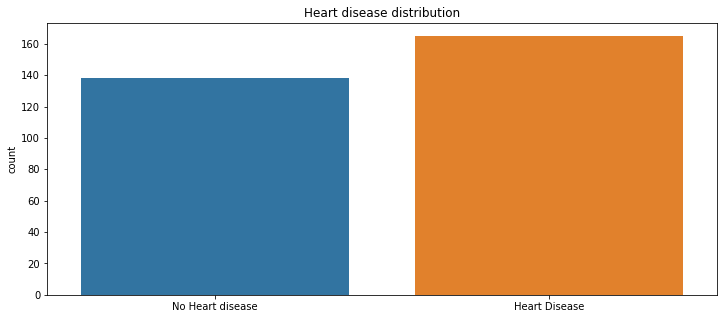

In [75]:
plt.figure(figsize=(12,5))
f = sns.countplot(x='target', data=df)
f.set_title("Heart disease distribution")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("")

Plot the distribution for male and female gender (skew). The distribution of “no heart disease” between males and females is skewed.


Text(0.5, 0, '')

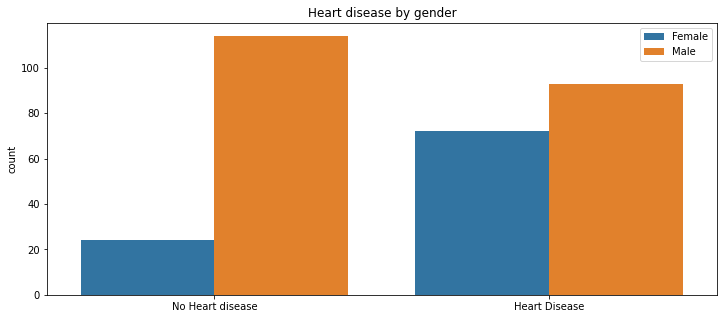

In [76]:
plt.figure(figsize=(12,5))
f = sns.countplot(x='target', data=df, hue='sex')
plt.legend(['Female', 'Male'])
f.set_title("Heart disease by gender")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("")

Plot a correlation map.
There is no strong correlation between any of the 14 attributes.

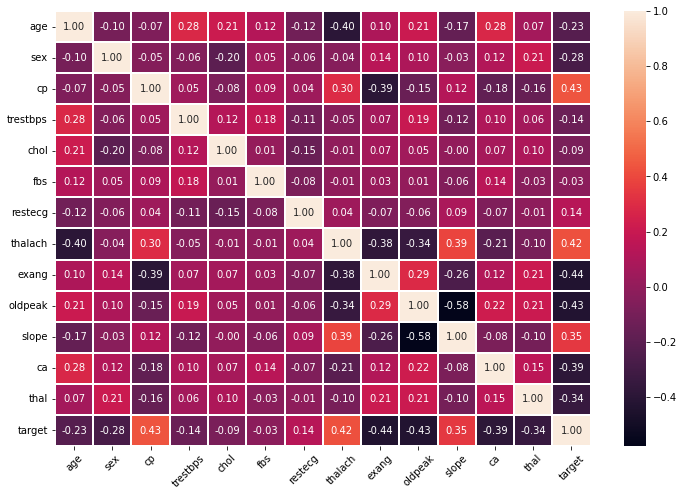

In [77]:
plt.figure(figsize=(12,8))
heat_map = sns.heatmap(df.corr(method='pearson'), annot=True,
fmt='.2f', linewidths=2)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45);
plt.rcParams["figure.figsize"] = (50,50)

**<h2 style="color:cyan">Defining X (input) and y (target)</h2>**

In [78]:
df["age"] = df["age"]/df["age"].max()

df["cp"] = df["cp"]/df["cp"].max()

df["trestbps"] = df["trestbps"]/df["trestbps"].max()

df["chol"] = df["chol"]/df["chol"].max()

df["thalach"] = df["thalach"]/df["thalach"].max()

df["oldpeak"] = df["oldpeak"]/df["oldpeak"].max()

df["slope"] = df["slope"]/df["slope"].max()

df["ca"] = df["ca"]/df["ca"].max()

df["thal"] = df["thal"]/df["thal"].max()

In [79]:
X = df.drop(['target'], axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.818182,1,1.000000,0.725,0.413121,1,0,0.742574,0,0.370968,0.0,0.0,0.333333
1,0.480519,1,0.666667,0.650,0.443262,0,1,0.925743,0,0.564516,0.0,0.0,0.666667
2,0.532468,0,0.333333,0.650,0.361702,0,0,0.851485,0,0.225806,1.0,0.0,0.666667
3,0.727273,1,0.333333,0.600,0.418440,0,1,0.881188,0,0.129032,1.0,0.0,0.666667
4,0.740260,0,0.000000,0.600,0.627660,0,1,0.806931,1,0.096774,1.0,0.0,0.666667


In [80]:
y = df['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [81]:
y.shape

(303,)

In [82]:
X = X.to_numpy()

In [83]:
y = y.to_numpy()

Converion to a NumPy array (better for NN)

In [84]:
X

array([[0.81818182, 1.        , 1.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.48051948, 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.66666667],
       [0.53246753, 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.88311688, 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.74025974, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       [0.74025974, 0.        , 0.33333333, ..., 0.5       , 0.25      ,
        0.66666667]])

In [85]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**<h2 style="color:cyan">Splitting the data</h2>**

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [87]:
y_test

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [88]:
y_test.shape

(61,)

In [89]:
print("Xtrain shape: ", X_train.shape)
print("ytrain shape: ", y_train.shape)
print("Xtest shape: ", X_test.shape)
print("ytest shape: ", y_test.shape)

Xtrain shape:  (242, 13)
ytrain shape:  (242,)
Xtest shape:  (61, 13)
ytest shape:  (61,)


**<h2 style="color:cyan">Parameters</h2>**


In [90]:
epoch = 100
activ = ["sigmoid", "relu", "softmax"]

# Hidden layers
layer_1 = 13 # Number of Neurons
layer_2 = 9

**<h2 style="color:cyan">Build the Network</h2>**


In [91]:
network = models.Sequential()  # linear stack of layers

network.add(layers.Dense(layer_1, activation=activ[1], input_shape = (13,))) # (13,) vector 
network.add(layers.Dense(layer_2, activation=activ[1])) # the info about input_shape is taken from the layer above

# Output Layer
network.add(layers.Dense(1, activation=activ[0]))

In [92]:
network.summary()  # Parameters: weight + bias

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 13)                182       
                                                                 
 dense_7 (Dense)             (None, 9)                 126       
                                                                 
 dense_8 (Dense)             (None, 1)                 10        
                                                                 
Total params: 318
Trainable params: 318
Non-trainable params: 0
_________________________________________________________________


**<h2 style="color:cyan" align="left">Complie / Configure the network</h2>**

- Optimizer: Mechasim to update the weights and biases
- Loss: (like error) How my model performs > MSE, MAE, etc.
- Metrics: Performance of my model > accuracy 

Accuracy --> between bad 0 and good 1. Pay attention to the numbers.

In [93]:
network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [94]:
from keras.callbacks import EarlyStopping, CSVLogger, ModelCheckpoint

from class_MyCustomCallback import MyCustomCallback

# Advanced: list of callback instances
"""
my_callback_list = [
                   EarlyStopping(min_delta= 0.001, patience = 5)  # early stopping if no improvement for 5 epochs more than 0.0001
                   # MyCustomCallback(), # uses my custome call back class #<--------------------------
                   # CSVLogger('./training.log'),  # logs the result for each epoch in a csv file
                   # ModelCheckpoint(filepath='./models/model.{epoch:02d}-{val_loss:.2f}.h5'),
                   # save the model under the name xyz
                    ]
"""

"\nmy_callback_list = [\n                   EarlyStopping(min_delta= 0.001, patience = 5)  # early stopping if no improvement for 5 epochs more than 0.0001\n                   # MyCustomCallback(), # uses my custome call back class #<--------------------------\n                   # CSVLogger('./training.log'),  # logs the result for each epoch in a csv file\n                   # ModelCheckpoint(filepath='./models/model.{epoch:02d}-{val_loss:.2f}.h5'),\n                   # save the model under the name xyz\n                    ]\n"

**<h2 style="color:cyan" align="left">Fit the network</h2>**

In [95]:
history = network.fit(X_train, y_train, epochs=epoch, shuffle=True, verbose=1, validation_split= 0.1, batch_size=5)

Epoch 1/100
44/44 [==============================] - 3s 28ms/step - loss: 0.6915 - accuracy: 0.4747 - val_loss: 0.6919 - val_accuracy: 0.4400
Epoch 2/100
44/44 [==============================] - 0s 6ms/step - loss: 0.6865 - accuracy: 0.4885 - val_loss: 0.6856 - val_accuracy: 0.5600
Epoch 3/100
44/44 [==============================] - 0s 8ms/step - loss: 0.6815 - accuracy: 0.5945 - val_loss: 0.6770 - val_accuracy: 0.5600
Epoch 4/100
44/44 [==============================] - 0s 8ms/step - loss: 0.6737 - accuracy: 0.5576 - val_loss: 0.6637 - val_accuracy: 0.5600
Epoch 5/100
44/44 [==============================] - 0s 5ms/step - loss: 0.6616 - accuracy: 0.6359 - val_loss: 0.6495 - val_accuracy: 0.5600
Epoch 6/100
44/44 [==============================] - 0s 8ms/step - loss: 0.6474 - accuracy: 0.6359 - val_loss: 0.6307 - val_accuracy: 0.6000
Epoch 7/100
44/44 [==============================] - 0s 5ms/step - loss: 0.6278 - accuracy: 0.6636 - val_loss: 0.5849 - val_accuracy: 0.6400
Epoch 8/100


In [96]:
# history = network.fit(X_train, y_train, epochs=epoch, shuffle=True, verbose=1, validation_split= 0.1)

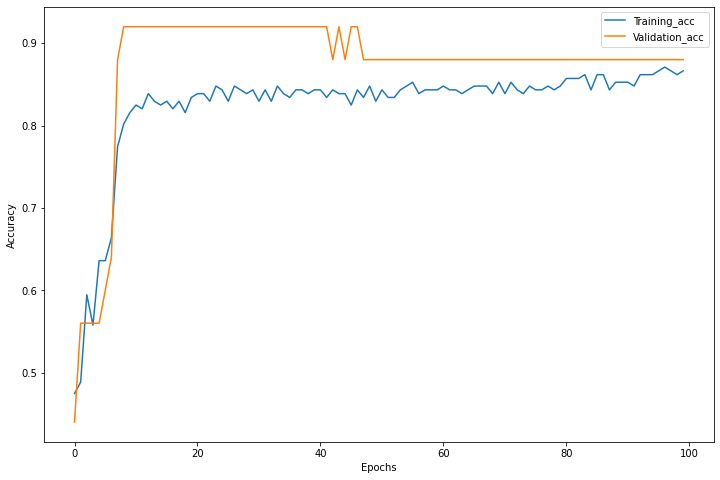

In [97]:
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training_acc", "Validation_acc"])
plt.show()

In [98]:
# Test score for test data using evaluation
test1_score, test2_score = network.evaluate(X_test, y_test)

print('Test Loss:', test1_score)
print('Test Accuracy: ', test2_score)

2/2 [==============================] - 1s 12ms/step - loss: 0.3602 - accuracy: 0.8361
Test Loss: 0.3602401316165924
Test Accuracy:  0.8360655903816223


In [99]:
prediction = network.predict(x = X_test)


In [100]:
# Just an overview of the predicted y data for y_test (20%)
for i in prediction:
    print("prediction for y_test", i)

prediction for y_test [0.9671639]
prediction for y_test [0.01308763]
prediction for y_test [0.86265624]
prediction for y_test [0.8719621]
prediction for y_test [0.32772464]
prediction for y_test [0.01506391]
prediction for y_test [0.00813967]
prediction for y_test [0.8545219]
prediction for y_test [0.95200455]
prediction for y_test [0.78591335]
prediction for y_test [0.0022949]
prediction for y_test [0.07698208]
prediction for y_test [0.00075829]
prediction for y_test [0.56104]
prediction for y_test [0.65578234]
prediction for y_test [0.22598046]
prediction for y_test [0.97363085]
prediction for y_test [0.89502096]
prediction for y_test [0.36162895]
prediction for y_test [0.80170965]
prediction for y_test [0.9764156]
prediction for y_test [0.7245752]
prediction for y_test [0.04324958]
prediction for y_test [0.8806511]
prediction for y_test [0.965634]
prediction for y_test [0.88106763]
prediction for y_test [0.9541404]
prediction for y_test [0.05587605]
prediction for y_test [0.15621755

In [101]:
rounded_prediction = np.round(prediction)

In [102]:
rounded_prediction

array([[1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [103]:
# Displays the prediction: [0.] --> actual label, target, outut ; 0  --> prediction
for i in range(10):
    print(f" real y_test: {rounded_prediction[i]}---> Predicted: {y_test[i]} ")

 real y_test: [1.]---> Predicted: 1 
 real y_test: [0.]---> Predicted: 0 
 real y_test: [1.]---> Predicted: 1 
 real y_test: [1.]---> Predicted: 1 
 real y_test: [0.]---> Predicted: 1 
 real y_test: [0.]---> Predicted: 0 
 real y_test: [0.]---> Predicted: 0 
 real y_test: [1.]---> Predicted: 1 
 real y_test: [1.]---> Predicted: 0 
 real y_test: [1.]---> Predicted: 0 


In [104]:
rounded_prediction.shape

(61, 1)

In [105]:
y_test

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [106]:
y_test.shape

(61,)

**<h2 style="color:cyan">Confusion Matrix</h2>**


In [107]:
# 1. Variant
# Code is copied from Scikit website

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[19  6]
 [ 4 32]]


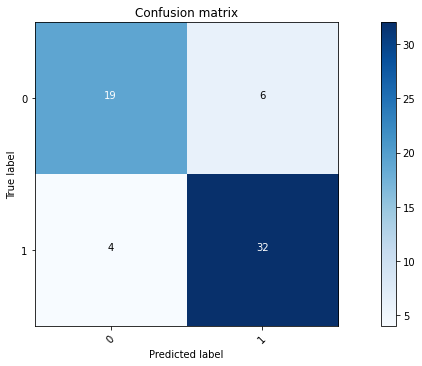

In [108]:
plt.figure(figsize=(12,5))
cm = confusion_matrix(y_true=y_test, y_pred=rounded_prediction)

# Create labels for my plot --> Classes
cm_plot_labels = ["0", "1"]

plot_confusion_matrix(cm= cm, classes= cm_plot_labels, title= "Confusion matrix")

**<h2 style="color:green" align="left">Save the Model</h2>**

1. Save the whole model (network): architecture, weights and biases, configuration

In [109]:
network.save("./models/heart_disease.h5")

2. save only the weights

In [110]:
network.save_weights("./models/heart_disease_weights.h5")

3. save only the architecture

In [111]:
# Save the architecture to json string
json_string = network.to_json()

# Save the architecture to YAML string  --> Removed due to security risks
#yaml_string = network.to_yaml()

print(json_string)

{"class_name": "Sequential", "config": {"name": "sequential_2", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 13], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_6_input"}}, {"class_name": "Dense", "config": {"name": "dense_6", "trainable": true, "batch_input_shape": [null, 13], "dtype": "float32", "units": 13, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_7", "trainable": true, "dtype": "float32", "units": 9, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "

**<h2 style="color:cyan">Load the Model</h2>**

In [112]:
# Loading the whole Model:

new_model = load_model("./models/heart_disease.h5")

# Gets the summary of the loaded mode
new_model.summary()

# Gets the optimizer name
print("My Optimizer is: " , new_model.optimizer)


# Get the weights
new_model.get_weights()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 13)                182       
                                                                 
 dense_7 (Dense)             (None, 9)                 126       
                                                                 
 dense_8 (Dense)             (None, 1)                 10        
                                                                 
Total params: 318
Trainable params: 318
Non-trainable params: 0
_________________________________________________________________
My Optimizer is:  <keras.optimizer_v2.adam.Adam object at 0x0000021E39F591C0>


[array([[ 0.2641374 , -0.06073811, -0.2340757 ,  0.14776462, -0.38420585,
          0.3759943 ,  0.108469  ,  0.53401154,  0.02427879, -0.19126242,
         -0.14019412,  0.37801912, -0.01432238],
        [-0.15296954,  0.46788412, -0.0977627 , -0.19172624, -0.37690714,
          0.62862104,  0.12156279,  0.3935374 , -0.5263321 ,  0.00219358,
         -0.02231934,  0.49919897, -0.02983822],
        [ 0.13026989,  0.1070546 ,  0.34280705, -0.04154431, -0.05104226,
          0.00863147, -0.58117574, -0.28757825,  0.12970245, -0.7966921 ,
         -0.42025223,  0.5885067 ,  0.42455527],
        [ 0.39869   ,  0.07006958,  0.05104362, -0.14992613, -0.08700857,
          0.55059844, -0.24220464,  0.17350297,  0.46618062,  0.5052294 ,
         -0.33848095,  0.32420382,  0.43328854],
        [ 0.26745492, -0.15712519, -0.21092479,  0.40219432, -0.09536156,
          0.26227748,  0.3048    , -0.1597788 ,  0.20025612, -0.2807532 ,
          0.27873868, -0.12302782, -0.17927192],
        [-0.127

In [113]:
network = models.Sequential()  # linear stack of layers

network.add(layers.Dense(layer_1, activation=activ[1], input_shape = (13,))) # (13,) vector 
network.add(layers.Dense(layer_2, activation=activ[1])) # the info about input_shape is taken from the layer above

# Output Layer
network.add(layers.Dense(1, activation=activ[0]))

In [114]:
# Load the weight

# Create a new model
model_2 = models.Sequential(
    [
        layers.Dense(layer_1, activation=activ[1], input_shape=(13,)),
        layers.Dense(layer_2, activation=activ[1]),
        layers.Dense(1, activation=activ[0])
    ]
)

# Model2 Compile (Config)


# Load Weights
model_2.load_weights("./models/heart_disease_weights.h5")

In [118]:
# Loading the architecture

model_architecture = model_from_json(json_string)

model_architecture.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 13)                182       
                                                                 
 dense_7 (Dense)             (None, 9)                 126       
                                                                 
 dense_8 (Dense)             (None, 1)                 10        
                                                                 
Total params: 318
Trainable params: 318
Non-trainable params: 0
_________________________________________________________________


In [120]:
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [121]:
history_2 = model_2.fit(X_train, y_train, epochs=epoch, shuffle=True, verbose=1, validation_split= 0.1, batch_size=5)

Epoch 1/100
44/44 [==============================] - 6s 33ms/step - loss: 0.3190 - accuracy: 0.8618 - val_loss: 0.3450 - val_accuracy: 0.8800
Epoch 2/100
44/44 [==============================] - 1s 21ms/step - loss: 0.3138 - accuracy: 0.8664 - val_loss: 0.3441 - val_accuracy: 0.8800
Epoch 3/100
44/44 [==============================] - 1s 17ms/step - loss: 0.3138 - accuracy: 0.8664 - val_loss: 0.3471 - val_accuracy: 0.8800
Epoch 4/100
44/44 [==============================] - 1s 17ms/step - loss: 0.3130 - accuracy: 0.8756 - val_loss: 0.3448 - val_accuracy: 0.8800
Epoch 5/100
44/44 [==============================] - 1s 14ms/step - loss: 0.3102 - accuracy: 0.8618 - val_loss: 0.3460 - val_accuracy: 0.8800
Epoch 6/100
44/44 [==============================] - 1s 14ms/step - loss: 0.3098 - accuracy: 0.8710 - val_loss: 0.3472 - val_accuracy: 0.8800
Epoch 7/100
44/44 [==============================] - 1s 14ms/step - loss: 0.3145 - accuracy: 0.8618 - val_loss: 0.3449 - val_accuracy: 0.8800
Epoch 

In [131]:
# Test score for test data using evaluation
test1_score, test2_score = model_2.evaluate(X_test, y_test)

print('Test Loss:', test1_score)
print('Test Accuracy: ', test2_score)

2/2 [==============================] - 1s 26ms/step - loss: 0.4318 - accuracy: 0.8197
Test Loss: 0.43183672428131104
Test Accuracy:  0.8196721076965332


In [132]:
prediction = model_2.predict(x = X_test)

In [133]:
# Just an overview of the predicted y data for y_test (20%)
for i in prediction:
    print("prediction for y_test", i)

prediction for y_test [0.9900242]
prediction for y_test [0.01138461]
prediction for y_test [0.86719435]
prediction for y_test [0.95457804]
prediction for y_test [0.253789]
prediction for y_test [0.01756218]
prediction for y_test [0.00090858]
prediction for y_test [0.84918535]
prediction for y_test [0.98555815]
prediction for y_test [0.7938625]
prediction for y_test [0.00011188]
prediction for y_test [0.12022707]
prediction for y_test [9.2831215e-06]
prediction for y_test [0.31753153]
prediction for y_test [0.6437183]
prediction for y_test [0.14839622]
prediction for y_test [0.9927386]
prediction for y_test [0.9404883]
prediction for y_test [0.27928618]
prediction for y_test [0.7382263]
prediction for y_test [0.99364173]
prediction for y_test [0.83968115]
prediction for y_test [0.02507943]
prediction for y_test [0.90016305]
prediction for y_test [0.9901321]
prediction for y_test [0.89101446]
prediction for y_test [0.98965704]
prediction for y_test [0.03486717]
prediction for y_test [0.0

In [134]:
rounded_prediction = np.round(prediction)


In [135]:
rounded_prediction

array([[1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [136]:
# 1. Variant
# Code is copied from Scikit website

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[20  5]
 [ 6 30]]


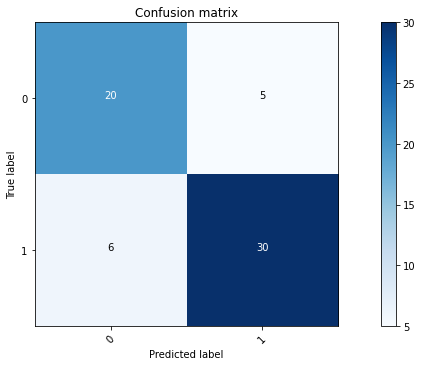

In [137]:
plt.figure(figsize=(12,5))
cm = confusion_matrix(y_true=y_test, y_pred=rounded_prediction)

# Create labels for my plot --> Classes
cm_plot_labels = ["0", "1"]

plot_confusion_matrix(cm= cm, classes= cm_plot_labels, title= "Confusion matrix")